# Tutorial for 2-photon calcium imaging and holographic optical stimulation dataset.

This tutorial shows how to access the *Two Photon dataset* using `pynwb`. 

This dataset contains the 2-photon calcium imaging holographic stimulation data and visual stimuli events.

Contents:

- [Reading an NWB file](#read-nwb)
- [Access subject and task metadata](#access-subject)
- [Access Imaging](#access-imaging)
- [Access Holographic Stimulus](#access-holostim)
- [Access Visual Stimulus](#access-visualstim)
- [View NWB files](#view-nwb)

A schematic representation where the source data is saved in NWB:

![Alt text](data_types_bruker.png)

# Reading an NWB file <a name="read-nwb"></a>

This section demonstrates how to read an NWB file using `pynwb`.

Based on the [NWB File Basics](https://pynwb.readthedocs.io/en/stable/tutorials/general/plot_file.html#sphx-glr-tutorials-general-plot-file-py) tutorial from [PyNWB](https://pynwb.readthedocs.io/en/stable/#).

An [NWBFile](https://pynwb.readthedocs.io/en/stable/pynwb.file.html#pynwb.file.NWBFile) represents a single session of an experiment. Each NWBFile must have a `session description`, `identifier`, and `session start time`.

Reading is carried out using the [NWBHDF5IO](https://pynwb.readthedocs.io/en/stable/pynwb.html#pynwb.NWBHDF5IO) class. To read the NWB file use the read mode ("r") to retrieve an NWBFile object.


In [1]:
from pynwb import NWBHDF5IO
# Choose which epoch to explore
epoch_name = "5stim"
# The file path to a .nwb file
nwbfile_path = f"/media/amtra/Samsung_T5/CN_data/MouseV1-conversion_nwb/nwb_stub/2023119_w57_1/2023119_w57_1_{epoch_name}.nwb"
io = NWBHDF5IO(path=nwbfile_path, mode="r", load_namespaces=True)
nwbfile = io.read()

nwbfile

root pynwb.file.NWBFile at 0x140466723355664
Fields:
  acquisition: {
    TwoPhotonSeriesChannel1Plane0 <class 'pynwb.ophys.TwoPhotonSeries'>,
    TwoPhotonSeriesChannel1Plane1 <class 'pynwb.ophys.TwoPhotonSeries'>,
    TwoPhotonSeriesChannel1Plane2 <class 'pynwb.ophys.TwoPhotonSeries'>,
    TwoPhotonSeriesChannel2Plane0 <class 'pynwb.ophys.TwoPhotonSeries'>,
    TwoPhotonSeriesChannel2Plane1 <class 'pynwb.ophys.TwoPhotonSeries'>,
    TwoPhotonSeriesChannel2Plane2 <class 'pynwb.ophys.TwoPhotonSeries'>
  }
  devices: {
    CustomMicroscope <class 'pynwb.device.Device'>,
    LightSource <class 'abc.LightSource'>,
    SpatialLightModulator2D <class 'abc.SpatialLightModulator2D'>
  }
  experiment_description: Holographic stimulation of single cells and ensembles of co-tuned cells in primary visual cortex.
  experimenter: ['Hendricks, Will']
  file_create_date: [datetime.datetime(2024, 2, 6, 10, 32, 41, 147942, tzinfo=tzoffset(None, 3600))]
  identifier: faad1d3e-8dc0-4267-afa7-e682476d1200
  imaging_planes: {
    ImagingPlaneChannel1Plane0 <class 'pynwb.ophys.ImagingPlane'>,
    ImagingPlaneChannel1Plane1 <class 'pynwb.ophys.ImagingPlane'>,
    ImagingPlaneChannel1Plane2 <class 'pynwb.ophys.ImagingPlane'>,
    ImagingPlaneChannel2Plane0 <class 'pynwb.ophys.ImagingPlane'>,
    ImagingPlaneChannel2Plane1 <class 'pynwb.ophys.ImagingPlane'>,
    ImagingPlaneChannel2Plane2 <class 'pynwb.ophys.ImagingPlane'>,
    ImagingPlaneHolographicStimulation <class 'pynwb.ophys.ImagingPlane'>
  }
  institution: UC Berkeley
  intervals: {
    PatternedOptogeneticStimulusTable <class 'abc.PatternedOptogeneticStimulusTable'>
  }
  keywords: <StrDataset for HDF5 dataset "keywords": shape (8,), type "|O">
  lab: Adesnik
  lab_meta_data: {
    Hologram0 <class 'abc.OptogeneticStimulusTarget'>,
    Hologram1 <class 'abc.OptogeneticStimulusTarget'>,
    Hologram2 <class 'abc.OptogeneticStimulusTarget'>,
    Hologram3 <class 'abc.OptogeneticStimulusTarget'>,
    Hologram4 <class 'abc.OptogeneticStimulusTarget'>,
    Hologram5 <class 'abc.OptogeneticStimulusTarget'>,
    Hologram6 <class 'abc.OptogeneticStimulusTarget'>,
    Hologram7 <class 'abc.OptogeneticStimulusTarget'>,
    TemporalFocusing <class 'abc.TemporalFocusing'>
  }
  ogen_sites: {
    OptogeneticStimulusSite <class 'abc.PatternedOptogeneticStimulusSite'>
  }
  processing: {
    ophys <class 'pynwb.base.ProcessingModule'>
  }
  session_description: Headfixed 2-photon calcium imaging and photostimulation of visual cortex.
  session_id: 2023119_w57_1
  session_start_time: 2023-01-19 14:08:54.217000-08:00
  subject: subject pynwb.file.Subject at 0x140466723354224
Fields:
  age: P120D
  age__reference: birth
  genotype: SST-Cre/wt;CaMK2-tTA/wt;tetO-GCaMP6s/wt
  sex: F
  species: Mus musculus
  strain: C57BL/6J
  subject_id: w57_1
  weight: 0.025

  surgery: Craniotomy and headplate implantation performed under isoflurane anesthesia. Mice were allowed to recover for 1 week before imaging.
  timestamps_reference_time: 2023-01-19 14:08:54.217000-08:00
  virus: AAV.PhP-TRE-ChroME2s-P2A-NLS-mRuby3

Importantly, the `session start time` is the reference time for all timestamps in the file. For instance, an event with a timestamp of 0 in the file means the event occurred exactly at the session start time.

The `session_start_time` is extracted from the ScanImage metadata (`epoch`) of the first .tiff of the epoch.

In [2]:
nwbfile.session_start_time

datetime.datetime(2023, 1, 19, 14, 8, 54, 217000, tzinfo=tzoffset(None, -28800))

# Access subject metadata <a name="access-subject"></a>

This section demonstrates how to access the [Subject](https://pynwb.readthedocs.io/en/stable/pynwb.file.html#pynwb.file.Subject) field in an NWB file.

The [Subject](https://pynwb.readthedocs.io/en/stable/pynwb.file.html#pynwb.file.Subject) field can be accessed as `nwbfile.subject`.


In [3]:
nwbfile.subject

subject pynwb.file.Subject at 0x140466723354224
Fields:
  age: P120D
  age__reference: birth
  genotype: SST-Cre/wt;CaMK2-tTA/wt;tetO-GCaMP6s/wt
  sex: F
  species: Mus musculus
  strain: C57BL/6J
  subject_id: w57_1
  weight: 0.025

# Access TwoPhoton Imaging <a name="access-imaging"></a>

This section demonstraces how to access the raw Two Photon imaging data.

`NWB` organizes data into different groups depending on the type of data. Groups can be thought of as folders within the file. Here are some of the groups within an NWBFile and the types of data they are intended to store:

- `acquisition`: raw, acquired data that should never change
- `processing`: processed data, typically the results of preprocessing algorithms and could change

## Raw TwoPhoton Imaging

The raw TwoPhoton imaging data is stored in `pynwb.ophys.TwoPhotonSeries` objects (for each channel and plane separately) which is added to `nwbfile.acquisition`. The data can be accessed as `nwbfile.acquisition['TwoPhotonSeriesChannel_number_Plane_number_']`.

The data in [TwoPhotonSeries](https://pynwb.readthedocs.io/en/stable/pynwb.ophys.html#pynwb.ophys.TwoPhotonSeries) is stored as a three dimensional array: the first dimension is time (frame), the second and third dimensions represent x and y (width by height). 

In [4]:
names_of_photon_series = nwbfile.acquisition.keys()
_ = [print(name) for name in names_of_photon_series]

TwoPhotonSeriesChannel1Plane0
TwoPhotonSeriesChannel1Plane1
TwoPhotonSeriesChannel1Plane2
TwoPhotonSeriesChannel2Plane0
TwoPhotonSeriesChannel2Plane1
TwoPhotonSeriesChannel2Plane2


In [5]:
channel_plane_combination = "Channel1Plane0"

In [6]:
photon_series = nwbfile.acquisition[f"TwoPhotonSeries{channel_plane_combination}"]

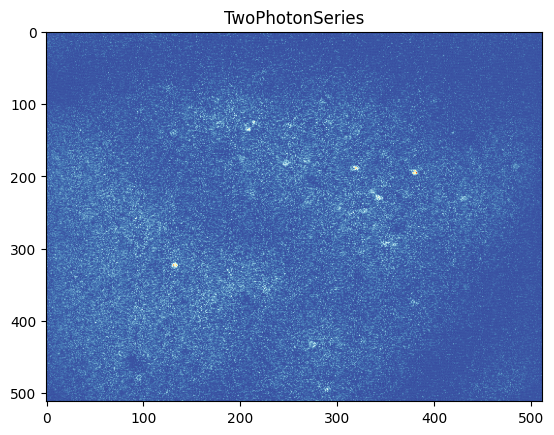

In [7]:
# Visualize the imaging data.

from matplotlib import pyplot as plt

plt.imshow(photon_series.data[50].T, aspect="auto", cmap="RdYlBu_r")
plt.title("TwoPhotonSeries")
plt.show()


In [8]:
photon_series.rate

6.356998212729953

In [9]:
photon_series.starting_time

0.0

## Accessing the segmentation data

The segmentation output for the Two Photon Imaging data is stored in `nwbfile.processing["ophys"]`. 

In NWB, the [PlaneSegmentation](https://pynwb.readthedocs.io/en/stable/pynwb.ophys.html#pynwb.ophys.PlaneSegmentation) class stores the detected regions of interest in the [TwoPhotonSeries](https://pynwb.readthedocs.io/en/stable/pynwb.ophys.html#pynwb.ophys.TwoPhotonSeries) data. The [ImageSegmentation](https://pynwb.readthedocs.io/en/stable/pynwb.ophys.html#pynwb.ophys.ImageSegmentation) can contain multiple `PlaneSegmentation` tables, so that we can store results of different segmentation algorithms or different segmentation classes.

We can access the plane segmentation for the [TwoPhotonSeries](https://pynwb.readthedocs.io/en/stable/pynwb.ophys.html#pynwb.ophys.TwoPhotonSeries) data as 
`nwbfile.processing["ophys"]["ImageSegmentation"]["PlaneSegmentationChannel_number_Plane_number_"]`.


In [10]:
names_of_plane_segmentation = nwbfile.processing["ophys"]["ImageSegmentation"].plane_segmentations.keys()
_ = [print(name) for name in names_of_plane_segmentation]

PlaneSegmentationChannel1ConcatenatedPlanes
PlaneSegmentationChannel1Plane0
PlaneSegmentationChannel1Plane1
PlaneSegmentationChannel1Plane2
PlaneSegmentationChannel2Plane0
PlaneSegmentationChannel2Plane1
PlaneSegmentationChannel2Plane2
PlaneSegmentationTargetedHologram


In [11]:
plane_segmentation = nwbfile.processing["ophys"]["ImageSegmentation"][f"PlaneSegmentation{channel_plane_combination}"][:]
plane_segmentation[:10]

image_mask ROICentroids  Accepted  \
id                                                                             
0   [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   [179, 435]         1   
1   [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   [202, 354]         1   
2   [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...     [79, 91]         1   
3   [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   [128, 354]         1   
4   [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...     [26, 79]         1   
5   [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...    [195, 89]         1   
6   [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   [253, 294]         1   
7   [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...    [20, 377]         1   
8   [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   [170, 163]         1   
9   [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   [220, 249]         1   

    Rejected  
id            
0          0  
1          0  
2          0  
3          0  
4          0  
5          0  
6          0  
7          0  
8          0  
9          0

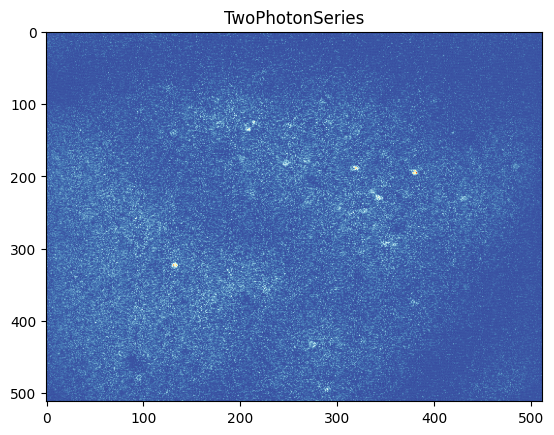

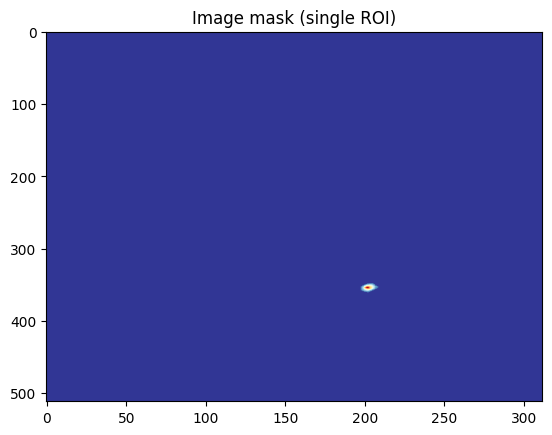

In [12]:
plt.imshow(photon_series.data[50].T, aspect="auto", cmap="RdYlBu_r")
plt.title("TwoPhotonSeries")
plt.show()

plt.imshow(plane_segmentation.image_mask[1].T, aspect="auto", cmap="RdYlBu_r")
plt.title("Image mask (single ROI)")
plt.show()


The summary images of the segmentation are stored in [Images](https://pynwb.readthedocs.io/en/stable/pynwb.base.html#pynwb.base.Images) container in NWB. 


In [13]:
images = nwbfile.processing["ophys"]["SegmentationImages"]
images

SegmentationImages pynwb.base.Images at 0x140466723347984
Fields:
  description: The summary images of the segmentation.
  images: {
    CorrelationImageChannel1Plane0 <class 'pynwb.image.GrayscaleImage'>,
    CorrelationImageChannel1Plane1 <class 'pynwb.image.GrayscaleImage'>,
    CorrelationImageChannel1Plane2 <class 'pynwb.image.GrayscaleImage'>,
    CorrelationImageChannel2Plane0 <class 'pynwb.image.GrayscaleImage'>,
    CorrelationImageChannel2Plane1 <class 'pynwb.image.GrayscaleImage'>,
    CorrelationImageChannel2Plane2 <class 'pynwb.image.GrayscaleImage'>,
    MeanImageChannel1Plane0 <class 'pynwb.image.GrayscaleImage'>,
    MeanImageChannel1Plane1 <class 'pynwb.image.GrayscaleImage'>,
    MeanImageChannel1Plane2 <class 'pynwb.image.GrayscaleImage'>,
    MeanImageChannel2Plane0 <class 'pynwb.image.GrayscaleImage'>,
    MeanImageChannel2Plane1 <class 'pynwb.image.GrayscaleImage'>,
    MeanImageChannel2Plane2 <class 'pynwb.image.GrayscaleImage'>
  }

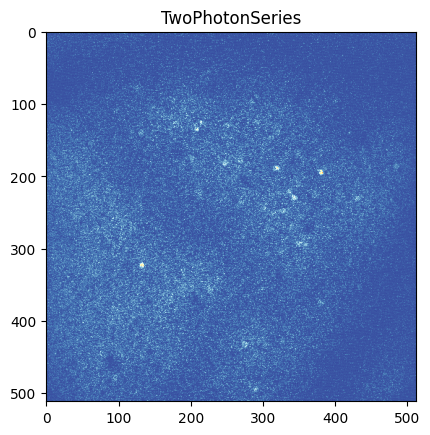

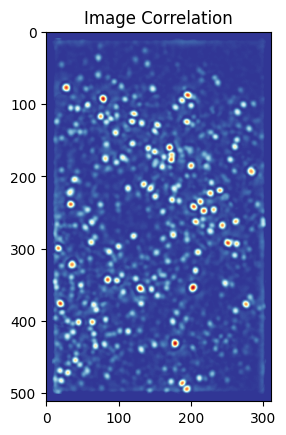

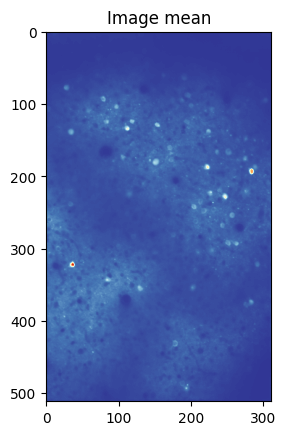

In [14]:
plt.imshow(photon_series.data[50].T, cmap="RdYlBu_r")
plt.title("TwoPhotonSeries")
plt.show()

plt.imshow(images.images[f"CorrelationImage{channel_plane_combination}"].data[:].T, cmap="RdYlBu_r")
plt.title("Image Correlation")
plt.show()

plt.imshow(images.images[f"MeanImage{channel_plane_combination}"].data[:].T, cmap="RdYlBu_r")
plt.title("Image mean")
plt.show()

The fluroscence traces are stored in a [Fluorescence](https://pynwb.readthedocs.io/en/stable/pynwb.ophys.html#pynwb.ophys.Fluorescence) container, the raw traces can be accessed as `nwbfile.processing["ophys"]["Fluorescence"]["RoiResponseSeries"]`.

In [15]:
nwbfile.processing["ophys"]["Fluorescence"].roi_response_series

{'DeconvolvedChannel1Plane0': DeconvolvedChannel1Plane0 pynwb.ophys.RoiResponseSeries at 0x140466714443584
 Fields:
   comments: no comments
   conversion: 1.0
   data: <HDF5 dataset "data": shape (100, 293), type "<f4">
   description: description of deconvolved traces
   offset: 0.0
   rate: 6.35621
   resolution: -1.0
   rois: rois <class 'hdmf.common.table.DynamicTableRegion'>
   starting_time: 0.0
   starting_time_unit: seconds
   unit: n.a.,
 'DeconvolvedChannel1Plane1': DeconvolvedChannel1Plane1 pynwb.ophys.RoiResponseSeries at 0x140466714953664
 Fields:
   comments: no comments
   conversion: 1.0
   data: <HDF5 dataset "data": shape (100, 319), type "<f4">
   description: description of deconvolved traces
   offset: 0.0
   rate: 6.35621
   resolution: -1.0
   rois: rois <class 'hdmf.common.table.DynamicTableRegion'>
   starting_time: 0.0
   starting_time_unit: seconds
   unit: n.a.,
 'DeconvolvedChannel1Plane2': DeconvolvedChannel1Plane2 pynwb.ophys.RoiResponseSeries at 0x14046

## Visualize raw traces

In [16]:
import pandas as pd
import numpy as np
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)

accepted_rois = plane_segmentation["Accepted"].values

#TODO plot only accepted
data = nwbfile.processing["ophys"]["Fluorescence"][f"RoiResponseSeries{channel_plane_combination}"].data[:, :10]
rate = nwbfile.processing["ophys"]["Fluorescence"][f"RoiResponseSeries{channel_plane_combination}"].rate
df = pd.DataFrame(data)
df["time"] = np.arange(0, data.shape[0])
df.set_index("time", inplace=True)
df.columns.name = 'ROIs'

import plotly.express as px

fig = px.line(df, facet_row="ROIs", facet_row_spacing=0.01)

# hide and lock down axes
fig.update_xaxes(visible=True, fixedrange=False)
fig.update_yaxes(visible=False, fixedrange=False)

# remove facet/subplot labels
fig.update_layout(annotations=[], overwrite=True)

# strip down the rest of the plot
fig.update_layout(
    showlegend=True,
    plot_bgcolor="white",
    margin=dict(t=10, l=10, b=10, r=10)
)

fig.show(config=dict(displayModeBar=True))

# Access Holographic Stimulus <a name="access-holostim"></a>

This section demonstrates how to access the holographic stimulation data and metadata.

The metadata about the stimulus pattern can be accessed as `nwbfile.lab_meta_data["TemporalFocusing"]`.

In [17]:
nwbfile.lab_meta_data["TemporalFocusing"]

TemporalFocusing abc.TemporalFocusing at 0x140466723355280
Fields:
  axial_point_spread_function_in_um: 10 um ± 0.1 um
  description: The temporal focusing pattern applied to the optogenetic stimulation.
  lateral_point_spread_function_in_um: 14 um ± 0.1 um

The metadata about the laser and the spatial light modulator can be accessed as `nwbfile.devices["LightSource"]` and `nwbfile.devices["SpatialLightModulator2D"]`. 

In [18]:
nwbfile.devices["LightSource"]

LightSource abc.LightSource at 0x140466723356288
Fields:
  description: Laser for optogenetic stimulation.
  exposure_time_in_s: 0.005
  manufacturer: Coherent, Inc.
  model: Monaco 40 W
  peak_power_in_W: 40
  peak_pulse_energy_in_J: 2e-05
  pulse_rate_in_Hz: 2000000
  stimulation_wavelength_in_nm: 1040.0

In [19]:
nwbfile.devices["SpatialLightModulator2D"]

SpatialLightModulator2D abc.SpatialLightModulator2D at 0x140466723351392
Fields:
  description: Spatial light modulator for optogenetic stimulation.
  manufacturer: Meadowlark Optics
  model: 1024 x 1024 1kHz SLM.
  spatial_resolution_in_px: [1024 1024]

The metadata about the optogenetic stimulus site can be accessed as `nwbfile.devices["OptogeneticStimulusSite"]

In [20]:
nwbfile.ogen_sites["OptogeneticStimulusSite"]

OptogeneticStimulusSite abc.PatternedOptogeneticStimulusSite at 0x140466730255648
Fields:
  description: The targeted location of the holographic stimulation is Primary visual cortex (V1), 140-200 um below pia
  device: CustomMicroscope pynwb.device.Device at 0x140466714442576
Fields:
  description: The mesoscale read/write platform was custom-built around a 2P random-access fluorescence mesoscope previously described in detail (Sofroniew 2016)
  manufacturer: Thorlabs Inc.

  effector: ChroME2s
  excitation_lambda: 1040.0
  light_source: LightSource abc.LightSource at 0x140466723356288
Fields:
  description: Laser for optogenetic stimulation.
  exposure_time_in_s: 0.005
  manufacturer: Coherent, Inc.
  model: Monaco 40 W
  peak_power_in_W: 40
  peak_pulse_energy_in_J: 2e-05
  pulse_rate_in_Hz: 2000000
  stimulation_wavelength_in_nm: 1040.0

  location: VISp
  spatial_light_modulator: SpatialLightModulator2D abc.SpatialLightModulator2D at 0x140466723351392
Fields:
  description: Spatial light modulator for optogenetic stimulation.
  manufacturer: Meadowlark Optics
  model: 1024 x 1024 1kHz SLM.
  spatial_resolution_in_px: [1024 1024]

The holograms are defined in `nwbfile.lab_meta_data`, and can be accessed by their name: `Hologram_number_`

In [21]:
for object in nwbfile.lab_meta_data:
    if object.startswith("Hologram"):
        print(object)

Hologram0
Hologram1
Hologram2
Hologram3
Hologram4
Hologram5
Hologram6
Hologram7


In [22]:
nwbfile.lab_meta_data["Hologram0"].targeted_rois[:]


voxel_mask  global_ids
id                                    
339  [[310, 122, 60, 1.0]]         940
239  [[385, 418, 34, 1.0]]         872
103   [[307, 147, 0, 1.0]]         788
272  [[114, 304, 60, 1.0]]         535
21    [[285, 176, 0, 1.0]]         720
300  [[213, 405, 60, 1.0]]         581
197  [[189, 453, 34, 1.0]]         429
253   [[151, 99, 60, 1.0]]         882
24    [[360, 200, 0, 1.0]]         723
23    [[292, 130, 0, 1.0]]         722

In [23]:
nwbfile.lab_meta_data["Hologram0"].segmented_rois[:]


voxel_mask  global_ids
id                                   
535  [[117, 300, 2, 1.0]]         535
581  [[214, 408, 2, 1.0]]         581
429  [[193, 454, 1, 1.0]]         429

/tmp/ipykernel_19253/3703647486.py:40: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



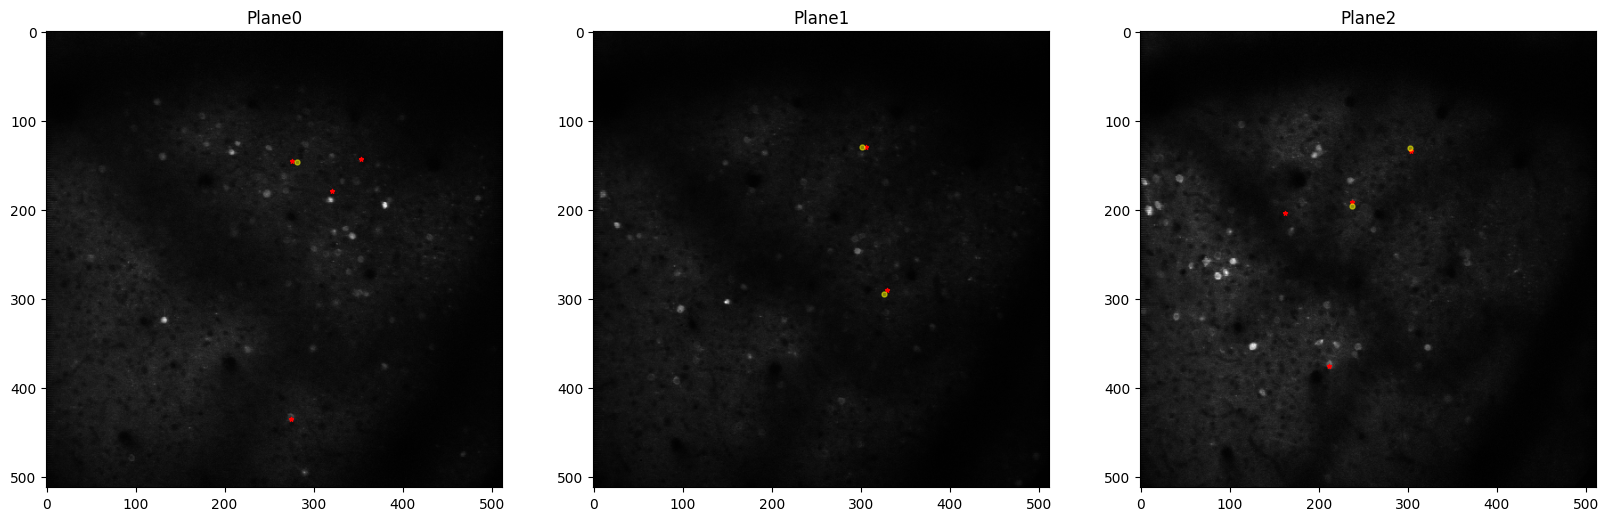

In [24]:
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(20, 15))
hologram = "Hologram4"
# Maximum projection here is used as background
import numpy as np
photon_series = nwbfile.acquisition[f"TwoPhotonSeriesChannel1Plane0"]
background_plane0 = np.sum(photon_series.data[:,:,:], axis=0)
photon_series = nwbfile.acquisition[f"TwoPhotonSeriesChannel1Plane1"]
background_plane1 = np.sum(photon_series.data[:,:,:], axis=0)
photon_series = nwbfile.acquisition[f"TwoPhotonSeriesChannel1Plane2"]
background_plane2 = np.sum(photon_series.data[:,:,:], axis=0)

ax0.imshow(background_plane0.T, cmap="grey")
ax0.set_title("Plane0")
ax1.imshow(background_plane1.T, cmap="grey")
ax1.set_title("Plane1")
ax2.imshow(background_plane2.T, cmap="grey")
ax2.set_title("Plane2")
for roi in nwbfile.lab_meta_data[hologram].targeted_rois[:]["voxel_mask"]:
    X = roi[0][0]
    Y = roi[0][1]
    Z = roi[0][2]
    if Z == 0:
        ax0.scatter(X,Y,s=9,c="red",marker='*')
    if Z == 34:
        ax1.scatter(X,Y,s=9,c="red",marker='*')
    if Z == 60:
        ax2.scatter(X,Y,s=9,c="red",marker='*')

for roi in nwbfile.lab_meta_data[hologram].segmented_rois[:]["voxel_mask"]:
    X = roi[0][0]
    Y = roi[0][1]
    Z = roi[0][2]
    if Z == 0:
        ax0.scatter(X,Y,s=13,c="yellow",marker='o', alpha=0.5)
    if Z == 1:
        ax1.scatter(X,Y,s=13,c="yellow",marker='o', alpha=0.5)
    if Z == 2:
        ax2.scatter(X,Y,s=13,c="yellow",marker='o', alpha=0.5)    

fig.show()


The holographic stimulation data is added to `nwbfile.intervals['PatternedOptogeneticStimulusTable']`. 

In [25]:
stimulus_table = nwbfile.intervals['PatternedOptogeneticStimulusTable']
stimulus_table[:5]

start_time  stop_time  frequency  \
id                                     
0    23.027958  23.197958         30   
1    24.087958  24.257958         30   
2    24.617958  24.787958         30   
3    24.794608  24.964608         30   
4    26.031308  26.201308         30   

                                        power_per_roi  \
id                                                      
0   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1   [0.0, 0.0, 0.0, 50.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
2   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 50.0, 0.0, 0.0,...   
3   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 50.0,...   
4   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 50.0, 0.0,...   

                                              targets  \
id                                                      
0   Hologram0 abc.OptogeneticStimulusTarget at 0x1...   
1   Hologram0 abc.OptogeneticStimulusTarget at 0x1...   
2   Hologram0 abc.OptogeneticStimulusTarget at 0x1...   
3   Hologram0 abc.OptogeneticStimulusTarget at 0x1...   
4   Hologram0 abc.OptogeneticStimulusTarget at 0x1...   

                                     stimulus_pattern  \
id                                                      
0   TemporalFocusing abc.TemporalFocusing at 0x140...   
1   TemporalFocusing abc.TemporalFocusing at 0x140...   
2   TemporalFocusing abc.TemporalFocusing at 0x140...   
3   TemporalFocusing abc.TemporalFocusing at 0x140...   
4   TemporalFocusing abc.TemporalFocusing at 0x140...   

                                        stimulus_site  
id                                                     
0   OptogeneticStimulusSite abc.PatternedOptogenet...  
1   OptogeneticStimulusSite abc.PatternedOptogenet...  
2   OptogeneticStimulusSite abc.PatternedOptogenet...  
3   OptogeneticStimulusSite abc.PatternedOptogenet...  
4   OptogeneticStimulusSite abc.PatternedOptogenet...

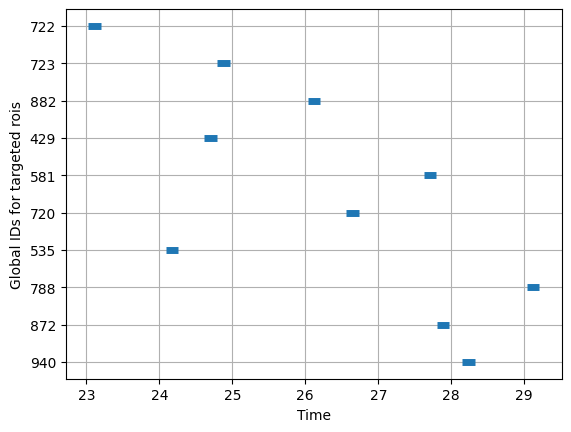

In [26]:

import pandas as pd

hologram = nwbfile.lab_meta_data["Hologram0"]
stimulus_table_df = stimulus_table.to_dataframe()
fig, ax = plt.subplots()
for i in stimulus_table_df.index[stimulus_table_df["targets"] == hologram][:10]:
    start_time = stimulus_table["start_time"][i]
    stop_time = stimulus_table["stop_time"][i]
    frequency = stimulus_table["frequency"][i]
    power = stimulus_table["power_per_roi"][i]
    for roi, p in zip(np.arange(len(hologram.targeted_rois)), power):
        ax.hlines(y=roi, xmin=start_time, xmax=stop_time, linewidth=p / 10)
    plt.yticks(np.arange(len(hologram.targeted_rois)), list(hologram.targeted_rois[:]["global_ids"]))
    plt.ylabel("Global IDs for targeted rois")
    plt.xlabel("Time")
    plt.grid(visible=True)

In [27]:
stimulus_table_df.index[stimulus_table_df["targets"]==hologram][:5]

Index([0, 1, 2, 3, 4], dtype='int64', name='id')

# Access Visual Stimulus <a name="access-visualstim"></a>

This section demonstrates how to access the visual stimulus data.

In [34]:
#need to open a epoch that contains visual stimulus 
epoch_name = "4ori"
# The file path to a .nwb file
nwbfile_path = f"/media/amtra/Samsung_T5/CN_data/MouseV1-conversion_nwb/nwb_stub/2023119_w57_1/2023119_w57_1_{epoch_name}.nwb"
io = NWBHDF5IO(path=nwbfile_path, mode="r", load_namespaces=True)
nwbfile = io.read()

In [35]:
nwbfile.intervals["VisualStimuli"]

VisualStimuli pynwb.epoch.TimeIntervals at 0x140466088836688
Fields:
  colnames: ['start_time' 'stop_time' 'contrast' 'orientation' 'size_vdeg']
  columns: (
    start_time <class 'hdmf.common.table.VectorData'>,
    stop_time <class 'hdmf.common.table.VectorData'>,
    contrast <class 'hdmf.common.table.VectorData'>,
    orientation <class 'hdmf.common.table.VectorData'>,
    size_vdeg <class 'hdmf.common.table.VectorData'>
  )
  description: vis orientation tuning example
  id: id <class 'hdmf.common.table.ElementIdentifiers'>

In [30]:
from nwbwidgets import nwb2widget

nwb2widget(nwbfile)

We also use [Neurosift](https://github.com/flatironinstitute/neurosift), a platform for the visualization of neuroscience data in the web browser.